In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Reshape images to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
# LeNet-5 model architecture
model = models.Sequential()

In [ ]:
# First convolutional layer: 6 filters, 5x5 kernel size, ReLU activation, followed by a 2x2 max-pooling layer
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Second convolutional layer: 16 filters, 5x5 kernel size, ReLU activation, followed by a 2x2 max-pooling layer
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Flatten the output from the convolutional layers
model.add(layers.Flatten())

In [ ]:
# First fully connected (dense) layer: 120 units, ReLU activation
model.add(layers.Dense(120, activation='relu'))

In [ ]:
# Second fully connected (dense) layer: 84 units, ReLU activation
model.add(layers.Dense(84, activation='relu'))

In [ ]:
# Output layer: 10 units (one for each class), softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8751 - loss: 0.4059 - val_accuracy: 0.9828 - val_loss: 0.0543
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 18ms/step - accuracy: 0.9808 - loss: 0.0605 - val_accuracy: 0.9823 - val_loss: 0.0523
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9869 - val_loss: 0.0380
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9902 - loss: 0.0324 - val_accuracy: 0.9887 - val_loss: 0.0343
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9914 - val_loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.9893 - val_loss: 0.0363
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9959 -

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 2s - 5ms/step - accuracy: 0.9904 - loss: 0.0346
Test accuracy: 0.9904


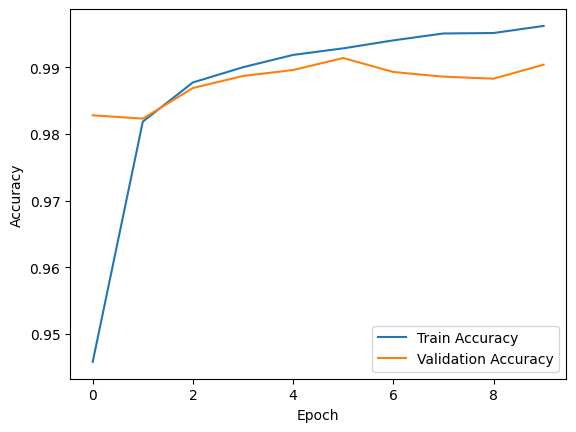

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Select a random image from the test set for prediction
random_index = np.random.randint(0, test_images.shape[0])
random_image = test_images[random_index]
random_label = test_labels[random_index]

In [ ]:
# Make a prediction
predicted_label = np.argmax(model.predict(np.expand_dims(random_image, axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


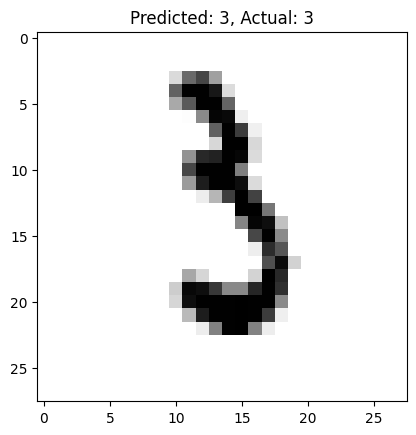

In [ ]:
# Display the image with the predicted label
plt.imshow(random_image.squeeze(), cmap=plt.cm.binary)
plt.title(f'Predicted: {predicted_label}, Actual: {random_label}')
plt.show()

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)